# KATRODIYA HET RUPESHBHAI

# 202518005

# Part 1: Data Exploration and Preprocessing

In [92]:
import pandas as pd
import numpy as np

In [93]:
df = pd.read_csv('Mall_Customers.csv')

In [94]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [96]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [97]:
X =df[['Annual Income (k$)','Spending Score (1-100)']]
print(X)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


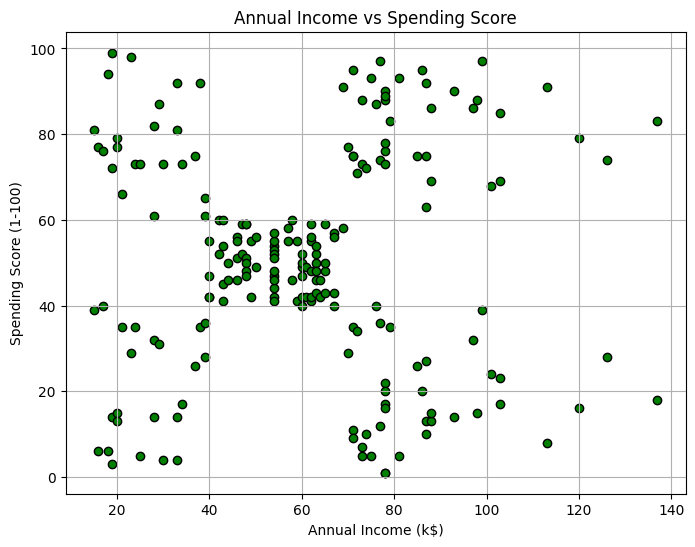

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'],color='green',edgecolors='k')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.grid(True)
plt.show()

# Part 2: K-Means Clustering

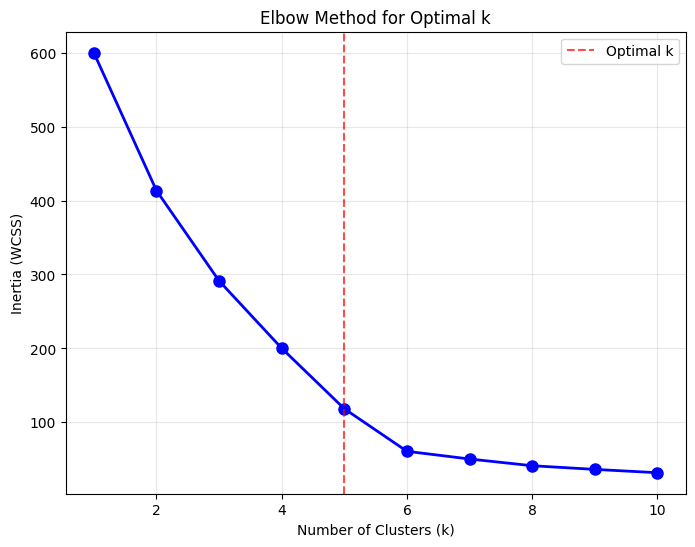

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
result = []
K_range = range(1, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled)
    result.append(kmeans_temp.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K_range, result, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True, alpha=0.3)
plt.axvline(x=5, color='red', linestyle='--', alpha=0.7, label='Optimal k')
plt.legend()
plt.show()

In [123]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

print("K-Means cluster centers:")
print(kmeans.cluster_centers_)

print("\nCluster assignments:")
print(np.bincount(kmeans_labels))

print(f"\nInertia (WCSS): {kmeans.inertia_:.2f}")
print("\nCluster labels:")
print(kmeans.labels_)

K-Means cluster centers:
[[-0.41351175  0.196232   -0.15376567]
 [ 0.83907311  1.26558288  0.77615053]
 [-1.30751869 -1.13696536 -1.55230105]
 [ 0.91241294 -1.35404058  1.55230105]
 [ 2.3737568  -0.12908169 -2.32845158]]

Cluster assignments:
[106  35  23  28   8]

Inertia (WCSS): 118.33

Cluster labels:
[2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 0 1
 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 4 4 1 4 4 4 4 4 4]


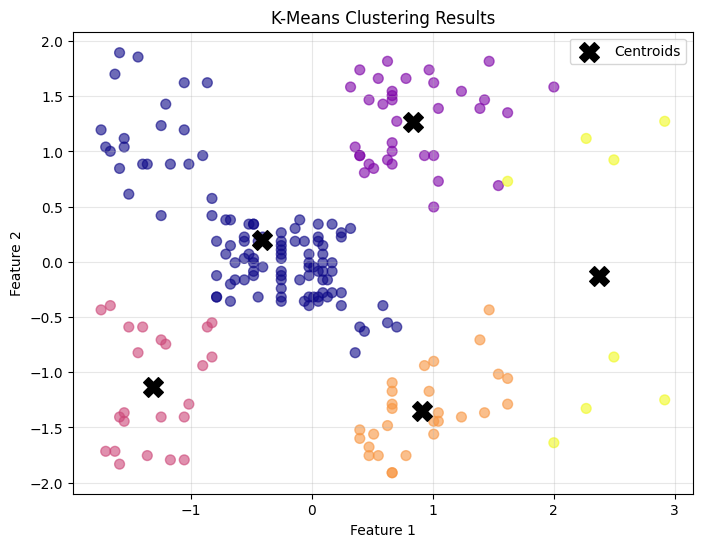

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='plasma', s=50, alpha=0.6)

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            c='black', s=200, marker='X', label='Centroids')

plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Part 3: Agglomerative Hierarchical Clustering

In [126]:
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score
import warnings
warnings.filterwarnings('ignore')


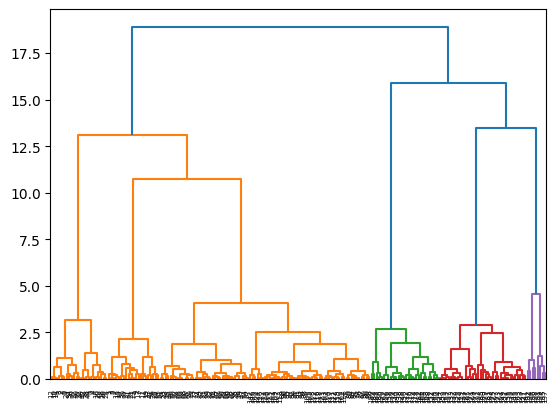

In [127]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(X_scaled, method='ward', metric='euclidean')
dn = dendrogram(linkage_data)

In [128]:
hc = AgglomerativeClustering(n_clusters = 6,linkage ='ward')
hierarchy_label=hc.fit_predict(X_scaled)

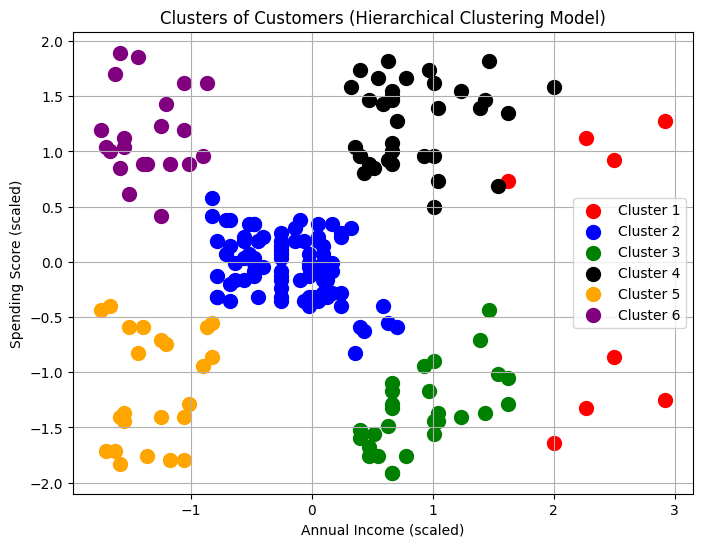

In [129]:
colors = ['red', 'blue', 'green', 'black', 'orange', 'purple']
labels = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6']

plt.figure(figsize=(8,6))
for i in range(6):
    plt.scatter(X_scaled[hierarchy_label == i, 0],
                X_scaled[hierarchy_label == i, 1],
                s=100, c=colors[i], label=labels[i])

plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()

# Part 4: DBSCAN Clustering

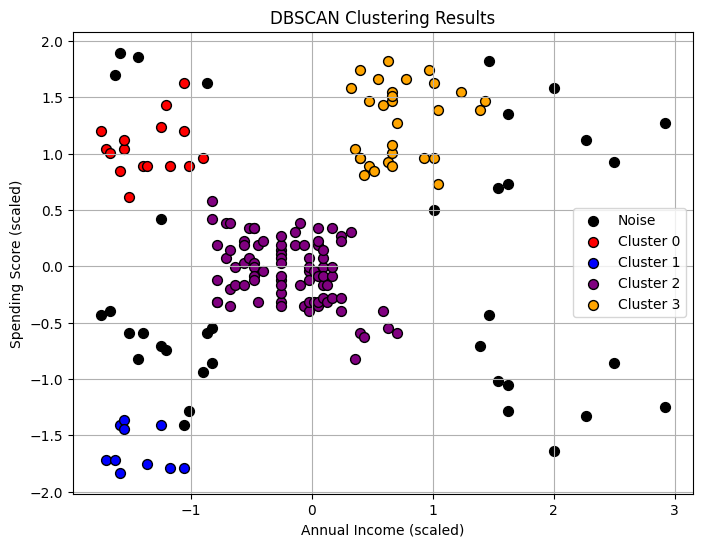

In [130]:
dbscan = DBSCAN(eps=0.45, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)


labels = dbscan_labels
unique_labels = np.unique(labels)

plt.figure(figsize=(8,6))

colors = ['green','red','blue','purple','orange']

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'black'
        label_name = 'Noise'
    else:
        label_name = f'Cluster {label}'
    
    plt.scatter(
        X_scaled[labels == label, 0], 
        X_scaled[labels == label, 1],  
        s=50,
        c=color,
        label=label_name,
        edgecolors='k'
    )

plt.title('DBSCAN Clustering Results')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()